## 1. Steady State Heat Conduction Problems
### 1.1 Key Concepts
Elliptic PDE's are used to model variaty of real worl problems. As an example, we can consider the steady state heat conduction in an isotropic and homogeneous solid. In 2 dimensions, if $T(x,y)$ represents temperature, then the model can be described by Laplace's equation in Cartesian coordinates

\begin{equation}
\nabla^2 T= \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2  T}{\partial y^2} + \frac{g}{k}=0, \qquad 0 < x < L, \quad 0 < y < H
\end{equation}

where $g$ is volumetric rate of internal heat generation and $k$ is the thermal conductivity of the material. The boundary conditions are

\begin{align*}
T(x,0)&= T_1, & T(x, H)&=T_3  \\
T(0, y)&= T_2, & T(L,y)&=T_4 
\end{align*}

We can solve this equation by using finite difference method. The first step in this process is to discretize the domain as can be seen in the following figure. 

<img src="img/discretization.png" alt="image" width="250" height="250" style="display: block; margin: 0 auto" >
<p style="text-align: center;">Figure : Simple 3x3 grid of points.</p> 

The temperature value at a given point in the domain, say $(x_i, y_j)$, is represented by $T(x_i, y_j) = T_{i,j}$. By replacing the partial derivatives with finite difference approximations, the equations can be approximated as

\begin{align}
\frac{\partial^2 T}{\partial x^2} &\approx \frac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2}   \\
\frac{\partial^2 T}{\partial y^2} &\approx \frac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^2}
\end{align}

For a uniform mesh size, i.e., $\Delta x = \Delta y$,  we obtain

\begin{equation}
T_{i-1,j} + T_{i+1,j} - 4T_{i,j} + T_{i,j-1} + T_{i,j+1} = -\frac{g}{k}\Delta x^2
\end{equation}

This equation gives us the temperature at point $(x_i, y_j)$ by using the values at neighboring points. 

As an example, if we discretize the domain into a 4x4 grid, we have 25 nodes in total. Since we know the side boundary conditions, our interest is on the 9 interior nodes. By using the recursion formula that is obtained above, we can write 9 equations for the 9 unknowns. By substituting the values of boundary conditions, this actually gives as a system of linear equations that can be written in matrix form as

\begin{equation}
\left({\begin{array}{cc} 
-4 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
1 & -4 & 1 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 1 & -4 & 0 & 0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & -4 & 1 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 1 & -4 & 1 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 1 & -4 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 & 0 & 0 & -4 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 1 & -4 & 1 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & -4 
\end{array}}\right)
\left(\begin{array}{cc} 
T_{2,2} \\
T_{3,2} \\
T_{4,2} \\
T_{2,3} \\
T_{3,3} \\
T_{4,3} \\
T_{2,4} \\
T_{3,4} \\
T_{4,4} \\
\end{array}\right)
= - \left(\begin{array}{c} 
T_{1,2} + T_{2,1} \\
T_{3,1} \\
T_{4,1} + T_{5,2} \\
T_{1,3} \\
0 \\
T_{5,3} \\
T_{1,4} + T_{2,5}  \\
T_{3,5} \\
T_{5,4} + T_{4,5} \\
\end{array}\right) 
- \left(\begin{array}{c}
\frac{g}{k}\Delta x^2 \\
\frac{g}{k}\Delta x^2 \\
\frac{g}{k}\Delta x^2 \\
\frac{g}{k}\Delta x^2 \\
\frac{g}{k}\Delta x^2 \\
\frac{g}{k}\Delta x^2 \\
\frac{g}{k}\Delta x^2 \\
\frac{g}{k}\Delta x^2 \\
\frac{g}{k}\Delta x^2 \\
\end{array}\right)
\end{equation}

which is a linear system of the form $Ax=b$.
#### Example 1.(Square Solid Object)
Consider an aluminium square thin plate of thermal conductivity $k$  has dimension $L$ $cm$ in each side and it generates heat in the medium at constant rate of $g_0$ . If the temperature along edge $y=L$ $cm$ is given by,
\begin{equation}
T(x,L)= T_0 , \quad 0<x<L
\end{equation}
while the other three edges are kept at $0$ $°C$. By setting $L=4$ $cm$ , $k=200$ $W/m°C$, $g_0 = 4 \times 10^6$ $ W/m^3$   and $T_0= 200$ $°C$ , using a mesh size $\Delta x = \Delta y = 1$ $cm$ solve the steady state temperature distribution $T$ at any point $(x,y)$.


For more detailed works and examples, one can analyse Özişik, M. N., Orlande, H. R., Colaço, M. J., & Cotta, R. M. (2017). Finite difference methods in heat transfer. CRC press.


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from mpl_toolkits.mplot3d import axes3d
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import numpy
from scipy.linalg import block_diag
from scipy import linalg

# constants 
L = 4
#k = 200
g = 4 * 10**6 
T_0 = 200
Deltax = Deltay = 1
N = int(L/Deltax)

# coefficient matrix where n= L/Deltax i.e n= 4/1 
def f(n):
    Ddiag  = -4 * np.eye(n-1)
    Dupper = np.diag([1] * (n - 2), 1)
    Dlower = np.diag([1] * (n - 2), -1)
    D = Ddiag + Dupper + Dlower
    Ds = [D] * (n- 1)
    B1  = block_diag(*Ds)
    I = np.ones((n - 1) * (n - 2))
    Iupper = np.diag(I, n - 1)
    Ilower = np.diag(I, -n + 1)
    B2 = Iupper + Ilower
    matrix = B1 + B2
    return matrix
A=f(N)

# matrix for the right hand side of the equation
def h(n,k):
    b = np.zeros((n - 1)**2)
    b[:(n-1)] = -(g/k) * (Deltax **2) - T_0
    b[(n-1):(n - 1)**2]=  -(g/k) * (Deltax **2)
    return b
S=h(N, 200)

# solve the system
def solve(x,y):
    solution = linalg.solve(x, y)
    return solution

data=solve(A,S)

# reshaping the solution
d1=np.reshape(solve(A,S), (N-1, N-1))
d2 = np.zeros((N + 1, N + 1))
d2[0] = T_0
d2[1:-1, 1:-1]=d1
print(f"interested values of temperature: {data.tolist()}")
#print(d2)


interested values of temperature: [13835.714285714286, 17605.357142857145, 13835.714285714286, 17537.5, 22550.0, 17537.500000000004, 13764.285714285714, 17519.64285714286, 13764.285714285716]


Text(0, 0.5, 'y')

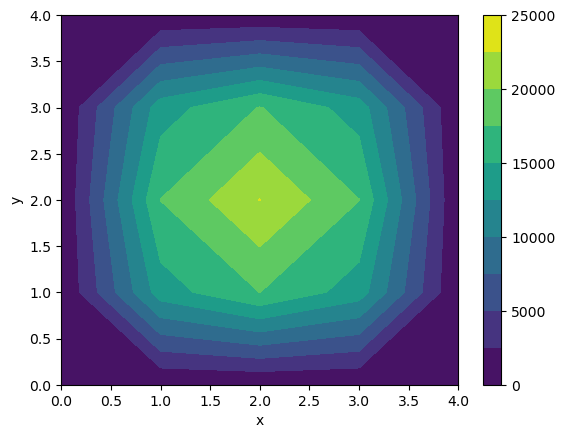

In [2]:
# plotting 
x_axis = np.linspace(0, L, N + 1)
y_axis = np.linspace(L, 0, N + 1)
X, Y = np.meshgrid(x_axis, y_axis)
plt.contourf(X, Y, d2, 10)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')